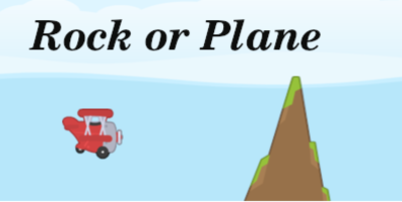

## Name of the game: 
Rock or Plane 

## The idea of the game: 
To fly as long as possible and not crash the plane


## The history of the creation of the game: 
The basis idea is taken from Google Chrome Dinosaur (T-Rex) Dino Runner game. This variation shows the interaction of a plane and a rock.
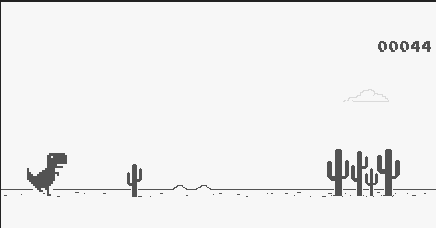

## Description of the game:
Imagine that you are a pilot and  you are flying through a rock range. Your task is to overcome as many mountain peaks on the way as possible. You get a point for every rock wich you passed. The game will be stopped in the event of a collision.

## Rules of the game:  

**Levels**:  
- The game has three levels, which differ in the plane's flight speed. 
- The level is set randomly when you start the game.

**Score**:  
- The game starts with a zero score. 
- As you overcome the rocks, points are awarded, one point for each rock.

**Control**:  
- The plane is controlled by the space bar. 
- When you press it, the plane rises up to a certain altitude and after this returns to the previously allowed flight altitude.

**Game over**:  
- If the plane crashes into a rock, then the game is over.

**Victory**:  
- Achievement is the number of points scored. The more points are the priority.


## Game implementations and description of object properties:
1. **The game launch window** contains **two buttons**.
- Launch button brings up the game window.
- The exit button closes the launch window.

2. The playing field consists of **3 objects**: clouds, plane, rock. 
**Clouds**:
- The clouds are located in three different locations.
- Clouds move from the right to the left.
- If the end of the playing field (left edge) is reached, the clouds remove from the playing field and appear at the playing field (right edge) on the first location.

**Rock**:
- The rock is located on the playing field.
- The rock moves from the right to the left.
- If the rock has moved from the right edge of the window to the left, then the rock removes and appears again on the first location.

**Plane**:
- The plane is located on the playing field.
- When spacebar is pressed, the plane moves up and moved down.
- While the plane moves up and down), other objects (clouds, rock) continue to move.

3. **Game levels**:
- There are three levels of the game, differing in the speed of movement of objects.
- The level is chosen randomly.
- The level is displayed on the playing field.

4. **Points**:
- If a new rock appears on the screen, then the score is changed by 1 (that is, there was no plaincrash).

5. **Game over**:
- If the rock has moved to the location of the plane, and the plane has not moved up and the plane has at the same height, then the game stops, it is a planecrash.
- Objects don't move.
- The plane does not respond when space button is pressed.
- The game "game over" appears on the playing field.

## Program code

The program consists of **two files**: start.py (game launch window) and mine.py (code for creating a game window and interaction between objects).

### start.py

- The code works.
- To see the result, the code should be run.

In [27]:
# Pictures are from https://kenney.nl/

from tkinter import *               # The packet works with graphical user interface.
import tkinter                      # The packet to create a buttons
from PIL import Image, ImageTk      # The packet allow to import the pictures.
from subprocess import Popen        # The packet allow to open the file.

# Creation of a game launch window with a title and specified dimensions.
game_start = Tk()
game_start.title('WELCOME TO THE GAME')
canvas = Canvas(master=game_start, width=400, height=200, background='white')
canvas.pack()

# Inserting an image as a background image.
img = [0]
img[0] = ImageTk.PhotoImage(Image.open('pictures/start.png'))
background = canvas.create_image(0, 0, anchor=NW, image=img[0])
canvas.update()

# Function to open the specified file.
def start():
    Popen(['python', 'main.py'])

# Window close function.
def exit():
    game_start.destroy()

# Creation of two buttons and binding them with selected functions.
startButton = tkinter.Button(game_start, height=2, width=8, text='Start', command=start)
startButton.place(x=150, y=80)

exitButton = tkinter.Button(game_start, height=2, width=8, text='Exit', command=exit)
exitButton.place(x=150, y=130)

# Launching tkinter, visualization of the created game launch window.
game_start.mainloop()

### The code contains two functions that are bound to buttons.

1. **start()**.
- The package **from subprocess import Popen** is used.
- The type of the file is **python** and the file name is specified, in this case it is **main.py**.
- When the function is called, the main.py file will be launched; when the file is launched, the game launch window appears on the computer screen.
- In the program code, the launch of the function is bound to the button.

In [33]:
# Function to open the specified file.
def start():
    Popen(['python', 'main.py'])

2. **exit()**
- **destroy() method** from tkinter is used.
- When the function is called, the game launch window disappears from the computer screen.
- In the program code, the launch of the function is bound to the button.

In [16]:
# Window close function.
def exit():
    game_start.destroy()

## main.py

- The code works.
- To see the result, the code should be run.

In [28]:
# Pictures are from https://kenney.nl/

from tkinter import *  # The packet works with graphical user interface.
from PIL import Image, ImageTk  # The packet allow to import the pictures.
from time import sleep  # The packet to freeze the screen.
import random  # The packet to generate random numbers.

# Creation a game playing field with game name and selected size.
game = Tk()
game.title('ROCK PLANE GAME')
canvas = Canvas(master=game, width=800, height=400, background='white')
canvas.pack()

# Importing the pictures for the graphical interface from the folder 'pictures'.
img = [0, 0, 0, 0]
img[0] = ImageTk.PhotoImage(Image.open('pictures/plane.png'))  # plane h 50 w 60
img[1] = ImageTk.PhotoImage(Image.open('pictures/cloud.png'))  # cloud h 50 w 80
img[2] = ImageTk.PhotoImage(Image.open('pictures/rock.png'))  # rock h 150 w 100
img[3] = ImageTk.PhotoImage(Image.open('pictures/background.png'))  # background h 400 w 800

# Placing all objects on the playing field.
background = canvas.create_image(0, 0, anchor=NW, image=img[3])
cloud = [0, 0, 0]
cloud[0] = canvas.create_image(450, 100, anchor=NW, image=img[1])
cloud[1] = canvas.create_image(200, 80, anchor=NW, image=img[1])
cloud[2] = canvas.create_image(650, 60, anchor=NW, image=img[1])
plane = canvas.create_image(50, 250, anchor=NW, image=img[0])
rock = canvas.create_image(650, 250, anchor=NW, image=img[2])

# Adding the score variable, placing it on the screen with chosen parameters (colour, font).
score = 0
text_score = canvas.create_text(700, 30, text='SCORE:' + str(score), fill='green', font=('Times', 25))

# Visualisation all objects on the playing field.
canvas.update()

# The function to set up the game level.
# The variable speed is selected randomly from the chosen list.
# Level is placed on the screen.
def level():
    global speed
    time_list = [0.01, 0.005, 0.0025]
    speed = random.choice(time_list)
    if speed == 0.01:
        level = 1
    elif speed == 0.005:
        level = 2
    else:
        level = 3
    canvas.create_text(100, 30, text='LEVEL:' + str(level), fill='green', font=('Times', 25))
    return speed
level()

# The function to move the cloud.
# Each cloud is moved by 5 on the x-axis to the left.
# When x becomes -40 (half the width of the cloud), the cloud is removed from the screen.
# When the cloud is removed, a new cloud is placed at the original location.
def move_cloud():
    global cloud
    for i in range(len(cloud)):
        canvas.move(cloud[i], -5, 0)
        if canvas.coords(cloud[i])[0] < -40:
            canvas.delete(cloud[i])
            if i == 0:
                cloud[0] = canvas.create_image(750, 100, anchor=NW, image=img[1])
            elif i == 1:
                cloud[1] = canvas.create_image(750, 80, anchor=NW, image=img[1])
            else:
                cloud[2] = canvas.create_image(750, 60, anchor=NW, image=img[1])
        canvas.update()

# The function to move the rock and update the game score.
# The rock is moved by 5 on the x-axis to the left.
# When x becomes -50 (half the width of the rock), the rock is removed from the screen.
# When the rock is removed, a new rock is placed at the original location.
# If the plane passed over the rock, then the score increases by 1.
def move_rock():
    global rock
    global score
    canvas.move(rock, -5, 0)
    if canvas.coords(rock)[0] < -50:
        canvas.delete(rock)
        rock = canvas.create_image(650, 250, anchor=NW, image=img[2])
        score += 1
        canvas.itemconfig(text_score, text='SCORE:' + str(score))
    canvas.update()
    return score

# Additional function to simplify the code.
def sum_move():
    move_cloud()
    move_rock()
    sleep(speed)

# A boolean variable to show where is the plane, flying straight (False) or moving up (True).
check_move_up = False

# The function to move the plane up.
# The plane can move up in range from 0 to 30.
# While the plane moves up, all the elements of the canvas are moved on the left by 5.
# After moving up the plane returns back.
# While the plane moving down, all canvas elements are moved on the left by 5.
def move_up():
    global check_move_up
    if check_move_up == False:
        check_move_up = True
        for i in range(0, 30):
            canvas.move(plane, 0, -5)
            canvas.update()
            sum_move()
        for i in range(0, 30):
            canvas.move(plane, 0, 5)
            canvas.update()
            sum_move()
        check_move_up = False

# A boolean variable to show the game_over status.
# If the game runs, game_over status is False.
game_over = False

# The function to check if the game is over.
# If the game is over, we get a message on the screen.
def check_game_over():
    global game_over
    if canvas.coords(rock)[0] < 60 and canvas.coords(plane)[1] > 210:
        game_over = True
        canvas.create_text(400, 200, text='GAME OVER', fill='black', font=('Times', 40))
    game.after(100, check_game_over)
    return game_over
check_game_over()

# The function which indicates was the button pressed or not.
# 'space' button is chosen for the game.
# The button is active only in case when the game is running.
# If the game is over the button is inactive.
# .keysym attribute is used to set keys in the string, numbers, special characters (here 'space').
def key_press(event):
    if event.keysym == 'space' and game_over == False:
        move_up()

# Binding the graphical interface with keyboard
canvas.bind_all('<KeyPress>', key_press)

# The program initialisation.
# If the game is not over, clouds and rock are moving and button is active.
while not game_over:
    sum_move()

game.mainloop()

## The object plaicing map
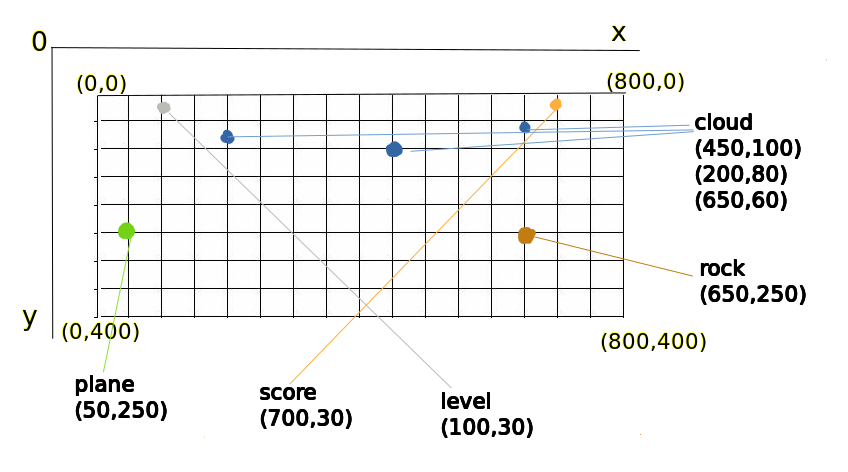

A description of the functions used will be presented in more detail below.

**Note**: since each of the functions is associated with previously declared variables and updating the playing field, they will not be launched separately.

### There are 7 functions in the program code.

1. **level()**
- A list of three game speed values is created, each of values determines **the level of difficulty of the game**.
- The higher the speed, the more difficult the level of the game.
- One speed is chosen **randomly** from this list.
- Depending on the selected value, **the current level of the game is displayed on the playing field**.
- When the function is called, the speed of the game is selected and returned, it is used in the program, the selected level of the game is displayed on the playing field.

In [ ]:
# The function to set up the game level.
# The variable speed is selected randomly from the chosen list.
# Level is placed on the screen.
def level():
    global speed
    time_list = [0.01, 0.005, 0.0025]
    speed = random.choice(time_list)
    if speed == 0.01:
        level = 1
    elif speed == 0.005:
        level = 2
    else:
        level = 3
    canvas.create_text(100, 30, text='LEVEL:' + str(level), fill='green', font=('Times', 25))
    return speed
level()

2. **move_cloud()**
- **The loop iterates over the elements of the list**, which contains the variables responsible for the location of the clouds on the playing field.
- Each element **moves along the x-axis to the left by 5**.
- **When the x-coordinate of the item reaches -40**, the item is removed from the playing field.
- The value -40 was chosen on the basis that the width of the picture used is 80, that is, with visual perception, when half of the cloud has left the screen, then the whole cloud disappears afterwards.
- Further, each considered **element is returned to its original position** values on the screen.
- Information about the changes is sent to the **.update()** function , which updates screen.
- When this function is called, each of the three clouds on the playing field  moves to the left across the screen, reache the end of the screen, disappear from the screen and reappear in the originally specified place.

In [ ]:
# The function to move the cloud.
# Each cloud is moved by 5 on the x-axis to the left.
# When x becomes -40 (half the width of the cloud), the cloud is removed from the screen.
# When the cloud is removed, a new cloud is placed at the original location.
def move_cloud():
    global cloud
    for i in range(len(cloud)):
        canvas.move(cloud[i], -5, 0)
        if canvas.coords(cloud[i])[0] < -40:
            canvas.delete(cloud[i])
            if i == 0:
                cloud[0] = canvas.create_image(750, 100, anchor=NW, image=img[1])
            elif i == 1:
                cloud[1] = canvas.create_image(750, 80, anchor=NW, image=img[1])
            else:
                cloud[2] = canvas.create_image(750, 60, anchor=NW, image=img[1])
        canvas.update()

3. **move_rock()**
- Moving the rock is done similarly to the previous function, that is, **the object is moved to the left by 5** along the x-axis.
- When the value of the x-coordinate of the object reaches -50, **the object is removed** from the playing field.
- After deletion, the object is **again added to the playing field** at the originally specified location.
- If a new object appears on the playing field, then it is considered that the previous object has been overcome,  the value of **the score increases by 1**.
- The playing field is updated with the **.update()** function.
- When the function is called, the rock moves left across the screen, goes off-screen by half, disappears from the screen and reappears on the screen. The score value changes.

In [ ]:
# The function to move the rock and update the game score.
# The rock is moved by 5 on the x-axis to the left.
# When x becomes -50 (half the width of the rock), the rock is removed from the screen.
# When the rock is removed, a new rock is placed at the original location.
# If the plane passed over the rock, then the score increases by 1.
def move_rock():
    global rock
    global score
    canvas.move(rock, -5, 0)
    if canvas.coords(rock)[0] < -50:
        canvas.delete(rock)
        rock = canvas.create_image(650, 250, anchor=NW, image=img[2])
        score += 1
        canvas.itemconfig(text_score, text='SCORE:' + str(score))
    canvas.update()
    return score

4. **sum_move()**
- An **optional function** that includes lines of repeating code.
- When the function is called, the clouds and the rock move around the screen.

In [37]:
# Additional function to simplify the code.
def sum_move():
    move_cloud()
    move_rock()
    sleep(speed)

5. **move_up()**
- The initial state of the plane is determined by the **check_move_up** variable and its False state.
- **The state of this variable is checked**, if the state is False, then the plane moves up  in the range **from 0 to 30** and then moves down to the originally specified position.
- If **the state** of the variable is **true**, then the ascent is not carried out further.
- **All moving objects continue to move** during the movement of the plane.
- The value of **check_move_up is updated and returned**.
- When the function iscalled, check_move_up is checked, if it is True, then nothing happens, if it is False, then the plane moves up and moves down, the rest of the objects are still moving, the value of check_move_up is changed to False and returned.

In [ ]:
# The function to move the plane up.
# The plane can move up in range from 0 to 30.
# While the plane moves up, all the elements of the canvas are moved on the left by 5.
# After moving up the plane returns back.
# While the plane moving down, all canvas elements are moved on the left by 5.
def move_up():
    global check_move_up
    if check_move_up == False:
        check_move_up = True
        for i in range(0, 30):
            canvas.move(plane, 0, -5)
            canvas.update()
            sum_move()
        for i in range(0, 30):
            canvas.move(plane, 0, 5)
            canvas.update()
            sum_move()
        check_move_up = False

6. **check_game_over()**
- If the plane approached close to the rock and did not move up, then **a collision occurs**.
- The moment of **approach is tied to the coordinate plane**: the rock has moved to a value along x = 60 and further, and the plane is at an altitude of y = 210 and higher (the y-axis is directed downward).
- **The values were chosen experimentally** for the used size of the pictures in the game, so that the optical effect of the collision was visible.
- If the collision conditions are met, then the value of the **'game_over'** variable **changes from False to True**.
- In case of a loss, **a message is displayed on the screen**.
- **game_over** state **is returned**.
- When the function is called, the location of objects (plane and rock) on the coordinate plane is checked, the condition is checked, depending on the condition, the value of the game_over is assigned the value True or False. If the conditions for the game_over are met, a message about this will appear on the screen.

In [ ]:
# The function to check if the game is over.
# If the game is over, we get a message on the screen.
def check_game_over():
    global game_over
    if canvas.coords(rock)[0] < 60 and canvas.coords(plane)[1] > 210:
        game_over = True
        canvas.create_text(400, 200, text='GAME OVER', fill='black', font=('Times', 40))
    game.after(100, check_game_over)
    return game_over
check_game_over()

7. **key_press()**
-  Here **the button click** event is handled.
-  **event.keysym** binds with a space.
- If the button is pressed and the state of the game is game over, then the function **move_up() lanches**.
- When the function is called, the game object (plane) reacts to pressing the spacebar and moves up / down on the screen

In [ ]:
# The function which indicates was the button pressed or not.
# 'space' button is chosen for the game.
# The button is active only in case when the game is running.
# If the game is over the button is inactive.
# .keysym attribute is used to set keys in the string, numbers, special characters (here is 'space').
def key_press(event):
    if event.keysym == 'space' and game_over == False:
        move_up()

## Additional functions
Below are the variations of the features, what can be changed in the game or what can be added to this game.

### The user interface selection function - game_interface()

- There is a base of profiles, from which the user chooses one and it is applied to the game. 
- To simplify the program code, the profiles are designated by names, without adding pictures to them, the profile selection here is implemented by entering data from the keyboard (in the game this should be implemented through other options, for example, the menu and settings section).
- No keyboard input validation is performed, as it is assumed that the function will be used via the button interface and other values cannot be obtained.
- The function returns values for the three main variables of the game.

In [19]:
# The list of pictures.
sky = 'picture_sky'
plane = 'picture_plane'
rock = 'picture_rock'
desert = 'picture_desert'
air_balloon = 'picture_air_balloon'
cactus = 'picture_cactus'
city = 'picture_city'
helicopter = 'picture_helicopter'
high_building = 'picture_high_building'

# The list of the styles.
game_style = [[0, sky, plane, rock], [1, desert, air_balloon, cactus], [2, city, helicopter, high_building]]

# Getting style from the user:
game_mode_user_choice = int(input('Choose the game mode (0, 1, 2): '))

# The game interface function.
def game_interface():
    global background, hero, obstacle        # Three main game variables: background, hero, obstacle.

    for i in range(3):
        if game_mode_user_choice == game_style[i][0]:
            background = game_style[i][1]
            hero = game_style[i][2]
            obstacle = game_style[i][3]
    return background, hero, obstacle

game_interface()

# To show the function output.
print('background =', background)
print('hero =', hero)
print('obstacle =', obstacle)

Choose the game mode (0, 1, 2): 4
background = picture_city
hero = picture_helicopter
obstacle = picture_high_building


### The function of dividing the game into levels - level_score()
- The division is based on the accumulated number of points.
- The game has 5 levels.
- As the points increase, the level increases.
- As the level increases, the speed of the game also increases.
- The function returns the speed and level of the game.
- To test the function, the score were entered from the keyboard.
- Input validation is not implemented, since it is assumed that the score will be taken from the gameplay, and not received from the user.

In [23]:
score = 0
level = 0
speed = 0

score = int(input('Input the score: '))

def level_score():
    global level, speed
    if 0 <= score < 10:
        level = 1
        speed = 1
    elif 10 <= score < 20:
        level = 2
        speed = 2
    elif 20 <= score < 30:
        level = 3
        speed = 3
    elif 30 <= score < 40:
        level = 4
        speed = 4
    else:
        level = 5
        speed = 5
    return level, speed

level_score()


# To show the function output.
print('score:', score, 'level:', level, 'speed:', speed)

Input the score: 23
score: 23 level: 3 speed: 3


### Bonus points at levels function
- A new object is added to the playing field (coin).
- The object appears only at 2 and 4 levels.
- The coin moves from right to left along the x-axis (similar to the objects described earlier in the program code).
- If the plane meets a coin, then bonus points are awarded, the coin delets from the screen and appears st the start point.

In [ ]:
img = [0, 0, 0, 0, 0]
img[0] = ImageTk.PhotoImage(Image.open('pictures/plane.png')) 
img[1] = ImageTk.PhotoImage(Image.open('pictures/cloud.png'))  
img[2] = ImageTk.PhotoImage(Image.open('pictures/rock.png'))  
img[3] = ImageTk.PhotoImage(Image.open('pictures/background.png'))  
img[4] = ImageTk.PhotoImage(Image.open('pictures/coin.png'))

def coin():
    global coin
    a = [2, 4]
    if level in a:
        coin = canvas.create_image(50, 250, anchor=NW, image=img[4])
        canvas.update()
    return coin
        
def coin_move():
    global coin
      canvas.move(coin, -5, 0)
        if canvas.coords(coin)[0] < -10:
            canvas.delete(coin)
            coin = canvas.create_image(50, 250, anchor=NW, image=img[0])
        canvas.update()  

def bonus_points():
    global score        
    if canvas.coords(plain) == canvas.cords(coin):
        score += 10
        canvas.delete(coin)
        coin = canvas.create_image(50, 250, anchor=NW, image=img[0])
        canvas.update()
        
    return score